In [1]:
import numpy as np; import pandas as pd
from typing import Literal, Tuple
import random as rd
from matplotlib import pyplot as plt
import Toolbox_20250725 as toolbox

In [2]:
dim = 3
# A = np.random.randint(-100, 100, (dim, dim))
A = np.array([[ 64, -58,  50],
              [-34,  51, -66],
              [ 75,  -1,  11]])
print(A)

[[ 64 -58  50]
 [-34  51 -66]
 [ 75  -1  11]]


In [3]:
game_i = toolbox.Game.fromMatrices(A, A)
print(game_i)

            C_0         C_1        C_2
R_0    (64, 64)  (-58, -34)   (50, 75)
R_1  (-34, -58)    (51, 51)  (-66, -1)
R_2    (75, 50)   (-1, -66)   (11, 11)


In [4]:
value_i, particularMaximin_i = toolbox.maximin(A, 'column')
print(value_i)
print(particularMaximin_i.T)

6.2415458937198025
[[0.52657005 0.47342995 0.        ]]


In [ ]:
thresholdAxis = np.linspace(A.min(), A.max(), 128)
specialThreshold = value_i

In [6]:
print(A.tolist())

[[64, -58, 50], [-34, 51, -66], [75, -1, 11]]


In [7]:
def supportThresholdVertices(support:list,
                             payoffMatrix:np.matrix, threshold:np.float64, 
                             player:Literal["row", "column"] = "column") -> pd.DataFrame:
    A_df = pd.DataFrame(payoffMatrix)
    columnsToKeep = []
    rowsToKeep = []
    for i, bool_i in enumerate(support):
        if int(bool_i): columnsToKeep.append(A_df.columns[i]); rowsToKeep.append(A_df.index[i])
    sub_A = np.matrix(A_df.loc[rowsToKeep, columnsToKeep])
    # print(sub_A)
    try: safeSpace = toolbox.thresholdVertices(sub_A, threshold, player)
    except KeyboardInterrupt: raise KeyboardInterrupt
    except ValueError as e: raise e
    return safeSpace

print(supportThresholdVertices("100", A, 6))

               Vertex_0
Probability_0       1.0


In [8]:
# layersToPlot:dict[float, list[tuple]] = {}

# for threshold_i in thresholdAxis[:]:
#     try:
#         safeSpace_111 = toolbox.thresholdVertices(A, threshold_i, "column")
#         # ^ The state vector can be seen as the col player's strategy
#     except KeyboardInterrupt: raise KeyboardInterrupt
#     except ValueError: continue # The safe space doesn't exist
#     print(safeSpace_i)
#     vertices_i:list[tuple] = []
#     for vertexName_j in safeSpace_i.columns:
#         vertex_j = safeSpace_i[vertexName_j]
#         firstTwoComponents_j = (vertex_j.iloc[0], vertex_j.iloc[1])
#         vertices_i.append(firstTwoComponents_j)
#     layersToPlot[threshold_i] = vertices_i

In [9]:
# print(supportThresholdVertices("110", A, 50))

In [10]:
layersToPlot_010:dict[float, list[tuple]] = {}
layersToPlot_011:dict[float, list[tuple]] = {}
layersToPlot_100:dict[float, list[tuple]] = {}
layersToPlot_101:dict[float, list[tuple]] = {}
layersToPlot_110:dict[float, list[tuple]] = {}
layersToPlot_111:dict[float, list[tuple]] = {}

for threshold_i in thresholdAxis[:]:

    try:
        safeSpace_i_010 = supportThresholdVertices("010", A, threshold_i)
        vertices_i_010:list[tuple] = []
        for vertexName_j in safeSpace_i_010:
            vertex_j = safeSpace_i_010[vertexName_j].tolist()
            firstTwoComponents_j = (0, vertex_j[0])
            vertices_i_010.append(firstTwoComponents_j)
        layersToPlot_010[threshold_i] = vertices_i_010
    except KeyboardInterrupt: raise KeyboardInterrupt
    except ValueError: pass

    try:
        safeSpace_i_011 = supportThresholdVertices("011", A, threshold_i)
        vertices_i_011:list[tuple] = []
        for vertexName_j in safeSpace_i_011:
            vertex_j = safeSpace_i_011[vertexName_j].tolist()
            firstTwoComponents_j = (0, vertex_j[1])
            vertices_i_011.append(firstTwoComponents_j)
        layersToPlot_011[threshold_i] = vertices_i_011
    except KeyboardInterrupt: raise KeyboardInterrupt
    except ValueError: pass

    try:
        safeSpace_i_100 = supportThresholdVertices("100", A, threshold_i)
        vertices_i_100:list[tuple] = []
        for vertexName_j in safeSpace_i_100:
            vertex_j = safeSpace_i_100[vertexName_j].tolist()
            firstTwoComponents_j = (vertex_j[0], 0)
            vertices_i_100.append(firstTwoComponents_j)
        layersToPlot_100[threshold_i] = vertices_i_100
    except KeyboardInterrupt: raise KeyboardInterrupt
    except ValueError: pass

    try:
        safeSpace_i_101 = supportThresholdVertices("101", A, threshold_i)
        vertices_i_101:list[tuple] = []
        for vertexName_j in safeSpace_i_101:
            vertex_j = safeSpace_i_101[vertexName_j].tolist()
            firstTwoComponents_j = (vertex_j[0], 0)
            vertices_i_101.append(firstTwoComponents_j)
        layersToPlot_101[threshold_i] = vertices_i_101
    except KeyboardInterrupt: raise KeyboardInterrupt
    except ValueError: pass

    try:
        safeSpace_i_110 = supportThresholdVertices("110", A, threshold_i)
        vertices_i_110:list[tuple] = []
        for vertexName_j in safeSpace_i_110:
            vertex_j = safeSpace_i_110[vertexName_j].tolist()
            firstTwoComponents_j = (vertex_j[0], vertex_j[1])
            vertices_i_110.append(firstTwoComponents_j)
        layersToPlot_110[threshold_i] = vertices_i_110
    except KeyboardInterrupt: raise KeyboardInterrupt
    except ValueError: pass

    try:
        safeSpace_i_111 = supportThresholdVertices("111", A, threshold_i)
        vertices_i_111:list[tuple] = []
        for vertexName_j in safeSpace_i_111:
            vertex_j = safeSpace_i_111[vertexName_j].tolist()
            firstTwoComponents_j = (vertex_j[0], vertex_j[1])
            vertices_i_111.append(firstTwoComponents_j)
        layersToPlot_111[threshold_i] = vertices_i_111
    except KeyboardInterrupt: raise KeyboardInterrupt
    except ValueError: pass

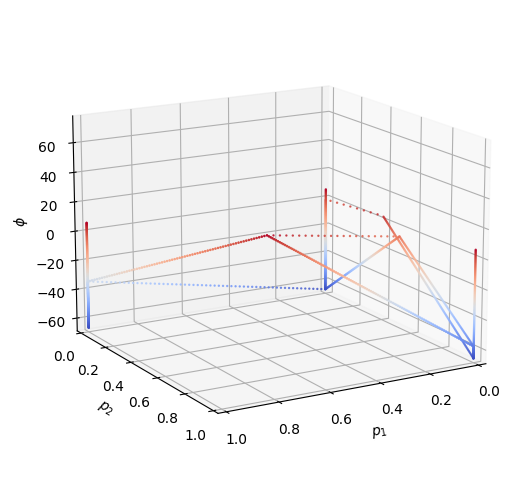

In [ ]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection = "3d")
ax.set_xlim([-0.01, 1.01])
ax.set_ylim([-0.01, 1.01])
ax.set_zlim([A.min()-0.01, A.max()+0.01])
ax.set_xlabel("$p_1$")
ax.set_ylabel("$p_2$")
ax.set_zlabel("$\phi$")
x, y, z = [], [], []

for threshold_i in layersToPlot_010.keys():
    vertices_i = layersToPlot_010[threshold_i]
    for vertex_j in vertices_i:
        x_j, y_j = vertex_j
        x.append(x_j); y.append(y_j); z.append(threshold_i)

for threshold_i in layersToPlot_011.keys():
    vertices_i = layersToPlot_011[threshold_i]
    for vertex_j in vertices_i:
        x_j, y_j = vertex_j
        x.append(x_j); y.append(y_j); z.append(threshold_i)

for threshold_i in layersToPlot_100.keys():
    vertices_i = layersToPlot_100[threshold_i]
    for vertex_j in vertices_i:
        x_j, y_j = vertex_j
        x.append(x_j); y.append(y_j); z.append(threshold_i)

for threshold_i in layersToPlot_101.keys():
    vertices_i = layersToPlot_101[threshold_i]
    for vertex_j in vertices_i:
        x_j, y_j = vertex_j
        x.append(x_j); y.append(y_j); z.append(threshold_i)

for threshold_i in layersToPlot_110.keys():
    vertices_i = layersToPlot_110[threshold_i]
    for vertex_j in vertices_i:
        x_j, y_j = vertex_j
        x.append(x_j); y.append(y_j); z.append(threshold_i)

for threshold_i in layersToPlot_111.keys():
    vertices_i = layersToPlot_111[threshold_i]
    for vertex_j in vertices_i:
        x_j, y_j = vertex_j
        x.append(x_j); y.append(y_j); z.append(threshold_i)

scatter = ax.scatter(
    x, y, z,
    c = z,
    cmap = "coolwarm",
    s = 0.5,
    alpha = 0.8,
)


ax.view_init(elev = 15, azim = 60)
plt.tight_layout()
# plt.savefig("./Plot_20250830_1156_AllSupports.jpg")
plt.show()